# Final Project Description: Predicting Rain Tomorrow in Australia

### Introduction:
In this final project, you will explore the machine learning techniques by
tackling a real-world problem: predicting whether it will rain tomorrow in various
locations across Australia. Weather forecasting is a crucial application of machine
learning, with far-reaching implications for agriculture, transportation, and public safety.
By the end of this project, you will have built and evaluated several classification models,
honing your skills in preprocessing, model selection, and interpretation of results.

### Dataset Description
The dataset provided contains approximately 10 years of daily
weather observations from multiple locations across Australia. Each observation includes
various features such as temperature, humidity, wind speed, and rainfall. The target
variable, RainTomorrow, indicates whether it rained the following day, with a binary
classification of "Yes" or "No". Specifically, if the rainfall for a given day exceeds 1mm,
RainTomorrow is labeled as "Yes".

# Packages
 

In [210]:
# Import necessary libraries
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# Data Loading and Preprocessing:
* Load the Aus dataset into a DataFrame.
* Standardize the data: Standardize the features by subtracting the mean and dividing by the standard deviation.

In [211]:
# Read the data
X_test = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_test.csv", delimiter=',')
X_train = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_train.csv", delimiter=',')
y_test = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_y_test.csv", delimiter=',')
y_train = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_y_train.csv", delimiter=',')

# Drop 'Date' and 'Location' from encoded datasets
X_train.drop(columns=['Date', 'Location'], errors='ignore', inplace=True)
X_test.drop(columns=['Date', 'Location'], errors='ignore', inplace=True)

# Get numerical features and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Drop missing values from feature datasets
X_train_cleaned = X_train.dropna(subset=numerical_features.tolist() + ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
X_test_cleaned = X_test.dropna(subset=numerical_features.tolist() + ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

# Convert 'Yes'/'No' to Binary values in cleaned datasets for 'RainToday'
X_train_cleaned['RainToday'] = X_train_cleaned['RainToday'].map({'Yes': 1, 'No': 0})
X_test_cleaned['RainToday'] = X_test_cleaned['RainToday'].map({'Yes': 1, 'No': 0})

# Apply one-hot encoding to the categorical columns in both training and testing datasets
X_train_encoded = pd.get_dummies(X_train_cleaned, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test_cleaned, columns=categorical_cols)

# Ensure both datasets have the same dummy variables, filling with 0 where categories do not match
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Align Y_train and Y_test with the indices of cleaned and encoded feature datasets
y_train_aligned = y_train.loc[X_train_encoded.index].copy()
y_test_aligned = y_test.loc[X_test_encoded.index].copy()

# Convert 'Yes'/'No' to Binary values in Y_train_aligned and Y_test_aligned
y_train_aligned['RainTomorrow'] = y_train_aligned['RainTomorrow'].map({'Yes': 1, 'No': 0})
y_test_aligned['RainTomorrow'] = y_test_aligned['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Drop any remaining missing values in the target datasets
y_train_aligned.dropna(subset=['RainTomorrow'], inplace=True)
y_test_aligned.dropna(subset=['RainTomorrow'], inplace=True)

# Assign it back to y_train and y_test for better interpretations
y_train = y_train_aligned
y_test = y_test_aligned

# Convert column vectors to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Realign the feature datasets to match the new indices of the target datasets
X_train_encoded = X_train_encoded.loc[y_train_aligned.index]
X_test_encoded = X_test_encoded.loc[y_test_aligned.index]

# Get feature names
features = X_train_encoded.columns

# Standardize the feature datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Print shapes of the datasets
print(X_train_scaled.shape)
print(X_test_scaled.shape)


/var/folders/ls/4s6834553ms65nrgr53vjz900000gn/T/ipykernel_3020/2856314395.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cleaned['RainToday'] = X_train_cleaned['RainToday'].map({'Yes': 1, 'No': 0})
/var/folders/ls/4s6834553ms65nrgr53vjz900000gn/T/ipykernel_3020/2856314395.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cleaned['RainToday'] = X_test_cleaned['RainToday'].map({'Yes': 1, 'No': 0})


(45083, 66)
(11337, 66)


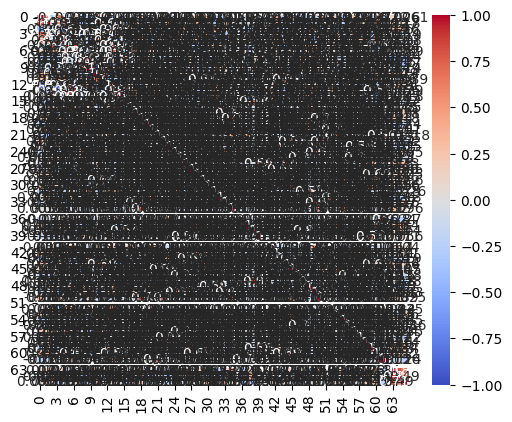

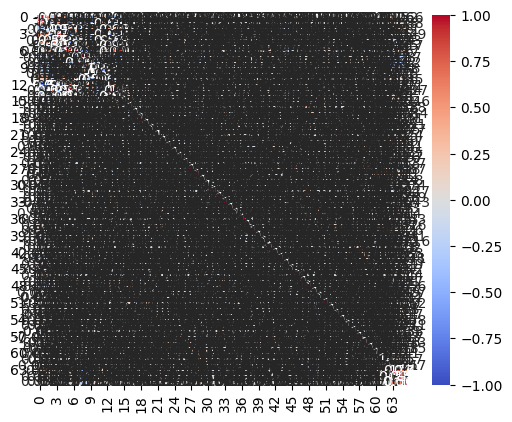

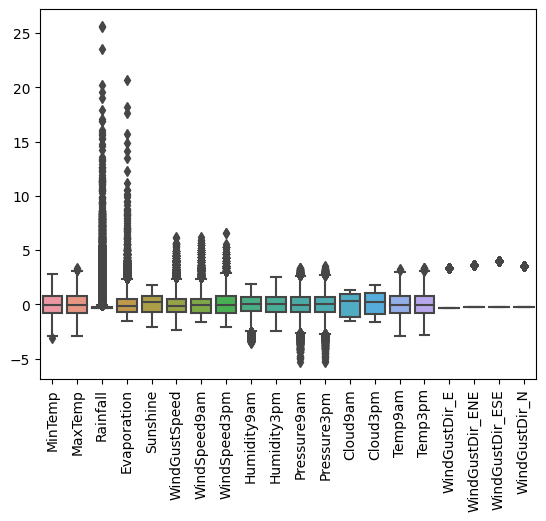

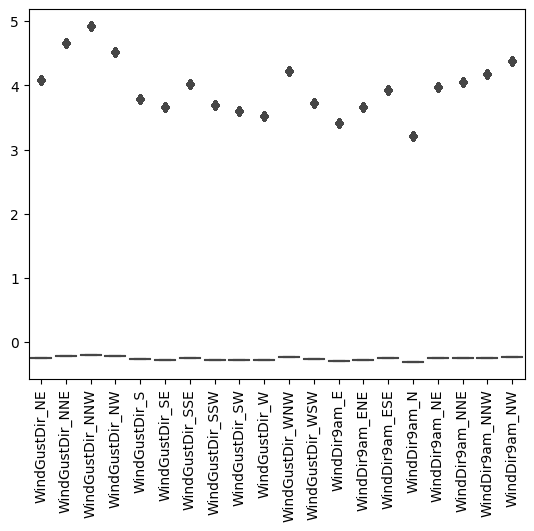

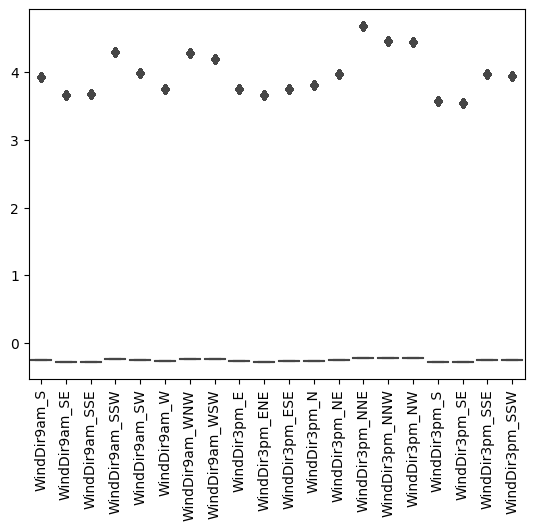

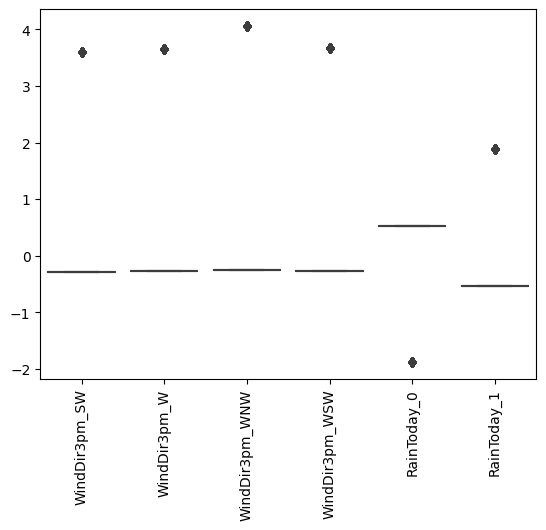

In [212]:
# Exploratory Data Analysis
# Visualize key statistics

# Calculate correlation matrix
#correlation_m = pd.DataFrame(X_train_scaled).corr()
#correlation_n = pd.DataFrame(X_test_scaled).corr()

# Visualize correlation matrix

# Visualize correlation matrix for training set
sns.heatmap(correlation_m, annot=True, cmap='coolwarm', square=True)
plt.show()

# Visualize correlation matrix for test set
sns.heatmap(correlation_n, annot=True, cmap='coolwarm', square=True)
plt.show()

# Visualize all features in a single graph

# Define the batch size (number of features to plot at once)
subset_size = 20

# Get the total number of features
num_features = X_train_scaled.shape[1]

# Loop through the features in batches
for i in range(0, num_features, subset_size):
    
    # Handle remaining features (if any)
	if i + subset_size >= num_features:
		remaining_features = X_train_scaled[:, i:]
		remaining_names = X_train_encoded.columns[i:].tolist()
		sns.boxplot(data=remaining_features)
		plt.xticks(range(len(remaining_names)), remaining_names, rotation=90)
		plt.show()
		break
        
	# Get the current batch of features
	features_to_plot = X_train_scaled[:, i:i+subset_size]
	
	# Get the corresponding feature names
	feature_names = X_train_encoded.columns[i:i+subset_size].tolist()
	
	# Create a boxplot for each feature
	sns.boxplot(data=features_to_plot)
	
	# Set x-tick labels as feature names
	plt.xticks(range(subset_size), feature_names, rotation=90)
	
	# Show the plot
	plt.show()

# Dimensionality Reduction: PCA

List of retained principal components
[9.13938534e-02 6.12924750e-02 4.26380154e-02 3.53724630e-02
 3.09626015e-02 2.78336542e-02 2.57025736e-02 2.32713255e-02
 2.29447811e-02 2.24172548e-02 2.04579237e-02 2.00978291e-02
 1.92659200e-02 1.87184625e-02 1.79744820e-02 1.77659447e-02
 1.74613930e-02 1.72549214e-02 1.69818830e-02 1.61577622e-02
 1.60674749e-02 1.59752918e-02 1.59509613e-02 1.57780666e-02
 1.57729839e-02 1.57478793e-02 1.56803848e-02 1.52824553e-02
 1.52546839e-02 1.50314475e-02 1.49353533e-02 1.48454037e-02
 1.46857970e-02 1.46339556e-02 1.43819779e-02 1.40285460e-02
 1.38874357e-02 1.35492264e-02 1.28983455e-02 1.23124439e-02
 1.20909357e-02 1.14973672e-02 1.10898541e-02 1.07432729e-02
 1.02115310e-02 8.92007113e-03 8.49494941e-03 8.12741977e-03
 7.64878593e-03 7.26748550e-03 6.99326568e-03 5.97592425e-03
 5.66869072e-03 4.63780133e-03 4.60498601e-03 4.22283426e-03
 3.75202130e-03 3.23183416e-03 1.27234685e-03 4.22398283e-04
 3.09836582e-04 1.50754644e-04 1.80242595e-32 2

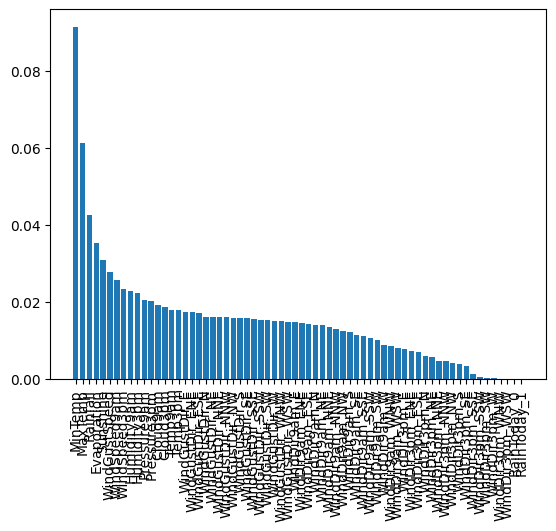

Cumulative sum of variance ratios
[0.09139385 0.15268633 0.19532434 0.23069681 0.26165941 0.28949306
 0.31519564 0.33846696 0.36141174 0.383829   0.40428692 0.42438475
 0.44365067 0.46236913 0.48034361 0.49810956 0.51557095 0.53282587
 0.54980776 0.56596552 0.58203299 0.59800829 0.61395925 0.62973731
 0.6455103  0.66125818 0.67693856 0.69222102 0.7074757  0.72250715
 0.7374425  0.75228791 0.7669737  0.78160766 0.79598964 0.81001818
 0.82390562 0.83745484 0.85035319 0.86266563 0.87475657 0.88625394
 0.89734379 0.90808706 0.91829859 0.92721867 0.93571361 0.94384103
 0.95148982 0.95875731 0.96575057 0.9717265  0.97739519 0.98203299
 0.98663797 0.99086081 0.99461283 0.99784466 0.99911701 0.99953941
 0.99984925 1.         1.         1.         1.         1.        ]
Explained variance ratio of each principal component:
[0.09139385 0.06129247 0.04263802 0.03537246 0.0309626  0.02783365
 0.02570257 0.02327133 0.02294478 0.02241725 0.02045792 0.02009783
 0.01926592 0.01871846 0.01797448 0.0177

In [213]:
# Dimensionality Reduction using PCA
# Apply PCA
"""Initialize PCA with a default value which is the total number of components"""
pca = PCA()
std_pca = pca.fit_transform(X_train_scaled)

# Determine the number of principal components to retain
retain = pca.explained_variance_ratio_
print("List of retained principal components")
print(retain)
print(len(retain))
print()

# Plot explained variance ratio

"""Makes a list of numbers to label the x-axis"""
x_label = []
for i in range(retain.size):
    x_label.append(i)

plt.bar(features, retain)
plt.xticks(rotation=90)
plt.show()

# Choose the number of components based on the explained variance ratio
"""This shows what number of components we need with the threshold of 0.95"""
print("Cumulative sum of variance ratios")
Cum_sum_pca = pca.explained_variance_ratio_.cumsum()
print(Cum_sum_pca)

"""Variables to find the cumulative sum and the threshold size for 95%"""
cumulative_sum = 0
best_comp_size = 0
"""Loops through the list of cumulative values and finds the sum before 95% and records the number of components needed to 
get that value"""
for sum in Cum_sum_pca:
    if sum < 0.95:
        cumulative_sum = sum
        best_comp_size += 1

# Perform PCA with the chosen number of components
"""Create another PCA instance with the best cumulative size"""
new_pca = PCA(n_components=best_comp_size)
std_pca = new_pca.fit_transform(X_train_scaled)

# Interpretation and Conclusion
# Interpret principal components
print("Explained variance ratio of each principal component:")
"""Calculates the explained variance ratio again but with a certain number of components"""
retain = new_pca.explained_variance_ratio_
print(retain)

# Summarize key findings
print("Summary:")
""" write your code inside the .format()!"""
print("PCA captures {}% of the variance with {} components.".format(cumulative_sum*100, best_comp_size))

# Select the top 90 features (columns) based on the explained variance ratio
selected_features = X_train_encoded.columns[np.argsort(retain)[::-1][:90]]
print(selected_features)
# Drop the rest of the features (columns) from the dataframe
X_train_reduced = X_train_encoded[selected_features]

# Decision Tree 

In [214]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train a decision tree classifier with default parameters
DTC = DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)

# Evaluate the classifier on the training set
train_set_predict = DTC.predict(X_train_scaled)
train_set_accuracy = accuracy_score(y_train, train_set_predict)
print(f"Train Accuracy: {train_set_accuracy}\n")

# Evaluate the classifier on the testing set
test_set_predict = DTC.predict(X_test_scaled)
test_set_accuracy = accuracy_score(y_test, test_set_predict)
print(f"Test Accuracy: {test_set_accuracy}\n")


# Visualize the learned tree
""" use plot_tree from sklearn.tree """
#plt.figure(figsize=(20,15))
#plot_tree(DTC, filled=True)
#plt.show()

Train Accuracy: 1.0

Test Accuracy: 0.80382817323807



' use plot_tree from sklearn.tree '

# Naive Bayesian 

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes classifier
NBC_model = GaussianNB()

NBC_model.fit(X_train_scaled, y_train)

predicted = NBC_model.predict(X_test_scaled)

accuracy = accuracy_score(predicted, y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7576078327599894


# Support Vector Machine (SVM)

In [216]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Comparison with SVM Classifiers: apply linear and a non-linear SVM classifiers
linear_svm = LinearSVC()

linear_svm.fit(X_train_scaled, y_train)

prediction = linear_svm.predict(X_test_scaled)
linear_svm_accuracy = accuracy_score(y_test, prediction)
print("Linear SVM Accuracy:", linear_svm_accuracy)

#HalvingGridSearchCV use this
# Task 4: Hyperparameter Tuning : Use GridSearchCV to find the best hyperparameters and print them out
#param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
##grid_search = 0 

/usr/local/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM Accuracy: 0.8548116785745788


/usr/local/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Simple Logistics Regression

In [217]:
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid

# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegression();

print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)

clf.fit(X_train_scaled, y_train)


(45083, 66) (45083,)
(11337, 66) (11337,)


LogisticRegression()

In [218]:
# Print accuracy
LR_predictions = clf.predict(X_test_scaled)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y_test, LR_predictions) + np.dot(1 - y_test,1 - LR_predictions)) / float(y_test.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 85 % (percentage of correctly labelled datapoints)


# Ensemble methods: Bagging

Training Bagging...
[[8358  451]
 [1188 1340]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      8809
         1.0       0.75      0.53      0.62      2528

    accuracy                           0.86     11337
   macro avg       0.81      0.74      0.77     11337
weighted avg       0.85      0.86      0.85     11337



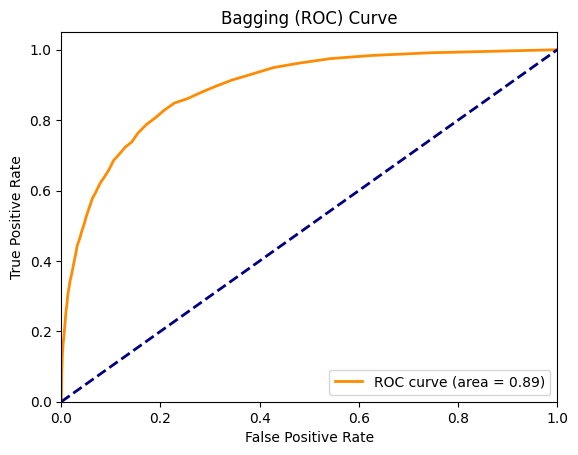

In [219]:
# Define ensemble classifiers
classifiers = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training {name}...")
    #train and predict for each model
    clf.fit(X_train_scaled, y_train)

    # Predict probabilities for the test data
    prediction = clf.predict(X_test_scaled)
    y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]
    #y_pred_class = np.where(y_pred_prob >= 0.5, 1, 0)
        
    # Compute evaluation metrics
    confuse_matrix = confusion_matrix(y_test, prediction)

    print(confuse_matrix)

    class_report = classification_report(y_test, prediction)

    print(class_report)

    # Compute ROC curve

    #Calculates fpr and tpr
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    #Computes area under the curve
    roc_auc = auc(fpr,tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} (ROC) Curve'.format(name))
    plt.legend(loc="lower right")
    plt.show()

# This is the Pre-processing data without encoding categorical values

In [220]:
# Read the data
X_test = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_test.csv", delimiter=',')
X_train = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_train.csv", delimiter=',')
y_test = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_y_test.csv", delimiter=',')
y_train = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_y_train.csv", delimiter=',')


# Replace 'Yes' and 'No' with 1 and 0
y_train['RainTomorrow'] = y_train['RainTomorrow'].map({'Yes': 1, 'No': 0})
y_test['RainTomorrow'] = y_test['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Drop rows with missing values in y_train and get the indices of remaining rows
y_train = y_train.dropna()
train_indices = y_train.index

# Select rows in X_train with the same indices
X_train_select = X_train.iloc[train_indices]

# Repeat for the test set
y_test = y_test.dropna()
test_indices = y_test.index
X_test_select = X_test.loc[test_indices]

#Drop date column
X_train_select.drop(columns=['Date'], axis=1, inplace=True)
X_test_select.drop(columns=['Date'], axis=1, inplace=True)

#Drop categorical columns for now
X_train_select.drop(columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1, inplace=True)
X_test_select.drop(columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1, inplace=True)

#Drop features with no strong correlation with other features
X_train_select.drop(columns=['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],axis=1, inplace=True)
X_test_select.drop(columns=['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],axis=1, inplace=True)

# Drop columns that are not in the selected features
#X_train = X_train[selected_features]
#X_test = X_test[selected_features]

features = X_train_select.columns

# Checks to see if there are the same number of rows

# Convert column vectors to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

"""# Impute missing values in categorical variables
cat_imputer = SimpleImputer(strategy='most_frequent')

# Select categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# One-Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Make sure both training and test dataframes have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1)"""

# Impute missing values in numerical variables
num_imputer = SimpleImputer(strategy='mean')

# Select numerical columns
#num_cols = X_train.select_dtypes(include=[np.number]).columns
num_imputer.fit(X_train_select)

X_train_imputed = num_imputer.transform(X_train_select)
X_test_imputed = num_imputer.transform(X_test_select)

X_train_df = pd.DataFrame(X_train_imputed, columns=features)
X_test_df = pd.DataFrame(X_test_imputed, columns=features)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

features = X_train_select.columns

print(X_train_df.shape)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# This is the Data pre-processing with encoding categorical values

In [ ]:
# Read the data
X_test = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_test.csv", delimiter=',').head(20000)
X_train = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_train.csv", delimiter=',').head(1000)
y_test = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_y_test.csv", delimiter=',').head(20000)
y_train = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_y_train.csv", delimiter=',').head(1000)

#Drop 'Date' and 'Location' from encoded datasets if they are not needed
X_train.drop(columns=['Date', 'Location'], errors='ignore', inplace=True)
X_test.drop(columns=['Date', 'Location'], errors='ignore', inplace=True)

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

#Drop missing values from feature datasets
X_train_cleaned = X_train.dropna(subset=numerical_features.tolist() + ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
X_test_cleaned = X_test.dropna(subset=numerical_features.tolist() + ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

#Convert 'Yes'/'No' to Binary values in cleaned datasets for 'RainToday'
X_train_cleaned['RainToday'] = X_train_cleaned['RainToday'].map({'Yes': 1, 'No': 0})
X_test_cleaned['RainToday'] = X_test_cleaned['RainToday'].map({'Yes': 1, 'No': 0})

#Apply one-hot encoding to the categorical columns in both training and testing datasets
X_train_encoded = pd.get_dummies(X_train_cleaned, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test_cleaned, columns=categorical_cols)

#Ensure both datasets have the same dummy variables, filling with 0 where categories do not match
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

#Align Y_train and Y_test with the indices of cleaned and encoded feature datasets
y_train_aligned = y_train.loc[X_train_encoded.index].copy()
y_test_aligned = y_test.loc[X_test_encoded.index].copy()

#Convert 'Yes'/'No' to Binary values in Y_train_aligned and Y_test_aligned
y_train_aligned['RainTomorrow'] = y_train_aligned['RainTomorrow'].map({'Yes': 1, 'No': 0})
y_test_aligned['RainTomorrow'] = y_test_aligned['RainTomorrow'].map({'Yes': 1, 'No': 0})

#Drop any remaining missing values in the target datasets
y_train_aligned.dropna(subset=['RainTomorrow'], inplace=True)
y_test_aligned.dropna(subset=['RainTomorrow'], inplace=True)

y_train = y_train_aligned
y_test = y_test_aligned

# Convert column vectors to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#Realign the feature datasets to match the new indices of the target datasets
X_train_encoded = X_train_encoded.loc[y_train_aligned.index]
X_test_encoded = X_test_encoded.loc[y_test_aligned.index]

#Get feature names
features = X_train_encoded.columns

#Standardize the feature datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

#Print shapes of the datasets
print(X_train_scaled.shape)
print(X_test_scaled.shape)
